In [7]:
# 🐟 Fish School Search - Algoritmo de Optimización Bioinspirada
# Implementación básica y educativa en Jupyter Notebook

import numpy as np
import matplotlib.pyplot as plt

# 🎯 1. Función objetivo: Sphere
def sphere_function(x):
    return np.sum(x**2)

# 🐟 2. Clase para el pez individual
class Fish:
    def __init__(self, dim, lower_bound, upper_bound):
        self.position = np.random.uniform(lower_bound, upper_bound, dim)
        self.fitness = None
        self.trajectory = [self.position.copy()] # Store initial position

# 🧠 3. Clase principal del algoritmo FSS
class FishSchoolSearch:
    def __init__(self, func, dim, num_fish, iterations, lower_bound, upper_bound, step_ind=0.1, step_vol=0.01):
        self.func = func
        self.dim = dim
        self.num_fish = num_fish
        self.iterations = iterations
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.step_ind = step_ind
        self.step_vol = step_vol
        self.fish_school = [Fish(dim, lower_bound, upper_bound) for _ in range(num_fish)]
        self.trajectories = [fish.trajectory for fish in self.fish_school] # Store trajectories for all fish

    def run(self):
        best_pos = None
        best_val = float("inf")
        best_history = []

        for it in range(self.iterations):
            for i, fish in enumerate(self.fish_school):
                # Movimiento individual aleatorio
                rand_direction = np.random.uniform(-1, 1, self.dim)
                rand_direction /= np.linalg.norm(rand_direction)
                new_position = fish.position + self.step_ind * rand_direction
                new_position = np.clip(new_position, self.lower_bound, self.upper_bound)

                new_fitness = self.func(new_position)

                # Acepta el nuevo movimiento si mejora
                if fish.fitness is None or new_fitness < fish.fitness:
                    fish.position = new_position
                    fish.fitness = new_fitness

                # Store the new position in the trajectory
                self.trajectories[i].append(fish.position.copy())

                # Actualiza el mejor global
                if fish.fitness < best_val:
                    best_val = fish.fitness
                    best_pos = fish.position

            best_history.append(best_val)

        return best_pos, best_val, best_history

In [8]:
# Configuración del algoritmo
dim = 2
num_fish = 30
iterations = 100
lower_bound = -5.12
upper_bound = 5.12

fss = FishSchoolSearch(
    func=sphere_function,
    dim=dim,
    num_fish=num_fish,
    iterations=iterations,
    lower_bound=lower_bound,
    upper_bound=upper_bound
)

best_pos, best_val, history = fss.run()
print("✅ Mejor posición encontrada:", best_pos)
print("🎯 Valor óptimo encontrado:", best_val)


✅ Mejor posición encontrada: [-0.00325196  0.00762144]
🎯 Valor óptimo encontrado: 6.866163888521162e-05


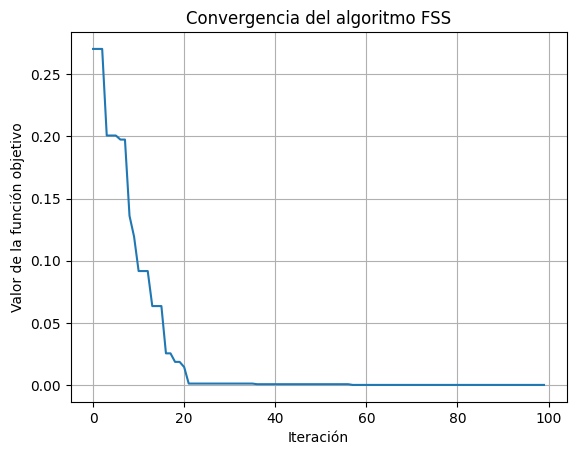

In [9]:
plt.plot(history)
plt.title("Convergencia del algoritmo FSS")
plt.xlabel("Iteración")
plt.ylabel("Valor de la función objetivo")
plt.grid(True)
plt.show()


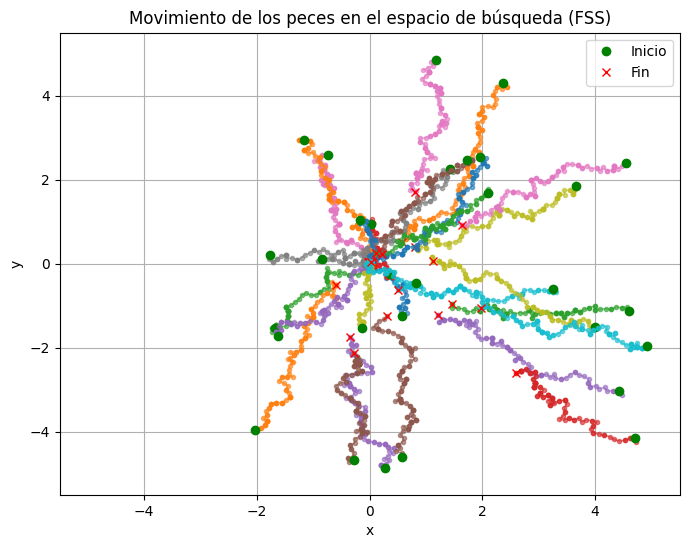

In [10]:
# 🎨 Visualización del movimiento de los peces
plt.figure(figsize=(8, 6))
for i, trajectory in enumerate(fss.trajectories):
    traj = np.array(trajectory)
    plt.plot(traj[:, 0], traj[:, 1], '-o', markersize=3, linewidth=1, alpha=0.6)
    plt.plot(traj[0, 0], traj[0, 1], 'go', label='Inicio' if i == 0 else "")   # Inicio
    plt.plot(traj[-1, 0], traj[-1, 1], 'rx', label='Fin' if i == 0 else "")   # Fin

plt.title("Movimiento de los peces en el espacio de búsqueda (FSS)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.xlim([-5.5, 5.5])
plt.ylim([-5.5, 5.5])
plt.show()